# 1) Delivery_time -> Predict delivery time using sorting time

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [21]:
#imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [22]:
#read_file
dt=pd.read_csv("C:\\Users\\836916\\Documents\\Python\\Notebook\\Untitled Folder\\delivery_time.csv")

In [23]:
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [24]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [25]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

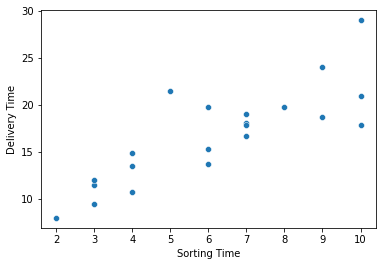

In [26]:
sns.scatterplot(x=dt['Sorting Time'],y=dt['Delivery Time'])

# Correlation

In [27]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\836916\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

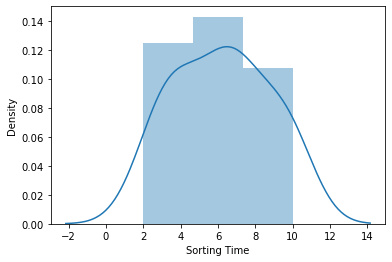

In [28]:
sns.distplot(dt['Sorting Time'])

C:\Users\836916\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

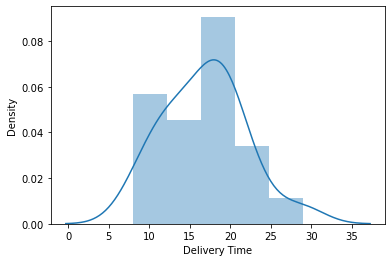

In [29]:
sns.distplot(dt['Delivery Time'])

In [91]:
#dt1=dt.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)

In [92]:
#dt1.head()

# Fitting a Linear Regression Model

In [93]:
model=smf.ols("Q('Delivery Time') ~ Q('Sorting Time')",data=dt)

In [94]:
model=model.fit()

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('Delivery Time')   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        10:52:45   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.5827      1.722      3.823      0.001       2.979      10.186
Q('Sorting Time')     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model.params

Intercept            6.582734
Q('Sorting Time')    1.649020
dtype: float64

In [41]:
model.pvalues

Intercept            0.001147
Q('Sorting Time')    0.000004
dtype: float64

In [42]:
model.tvalues

Intercept            3.823349
Q('Sorting Time')    6.387447
dtype: float64

In [46]:
model.rsquared

0.6822714748417231

In [47]:
model.rsquared_adj

0.6655489208860244

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

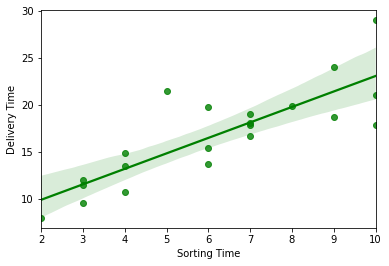

In [43]:
sns.regplot(x=dt['Sorting Time'],y=dt['Delivery Time'], data=dt, color='green')

# Predict for new data point

In [54]:
newdata=pd.Series([9,10])

In [55]:
newdata

0     9
1    10
dtype: int64

In [56]:
df=pd.DataFrame(data=newdata,columns=['Sorting Time'])

In [57]:
df

,Sorting Time
0,9
1,10


In [58]:
model.predict(df)

0    21.423913
1    23.072933
dtype: float64

In [59]:
model.mse_model

351.43283843211566

In [60]:
model.mse_resid

8.613660132645544

In [61]:
model.mse_total

25.754619047619048

In [62]:
import numpy as np
np.sqrt(model.mse_resid)

2.9349037688901394

# 2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [63]:
sd=pd.read_csv("C:\\Users\\836916\\Documents\\Python\\Notebook\\Untitled Folder\\Salary_Data.csv")

In [64]:
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [67]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [68]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

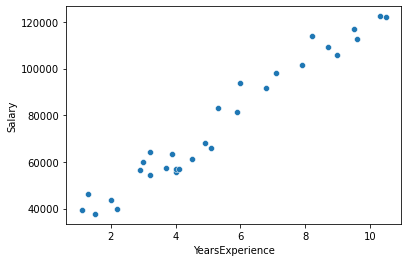

In [83]:
sns.scatterplot(x=sd['YearsExperience'],y=sd['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

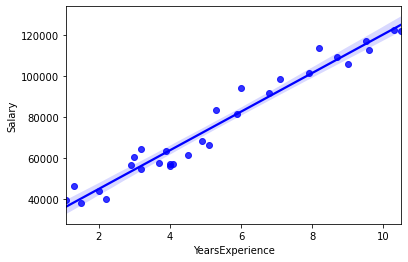

In [88]:
sns.regplot(x=sd['YearsExperience'],y=sd['Salary'],data=sd,color='blue')

# Fitting a Linear Regression Model

In [65]:
model2=smf.ols("Salary ~ YearsExperience",data=sd).fit()

In [66]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        10:26:32   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predict for new data point

In [69]:
nd2=pd.Series([1,2,3,4,5])

In [71]:
df2=pd.DataFrame(data=nd2,columns=['YearsExperience'])

In [72]:
df2

,YearsExperience
0,1
1,2
2,3
3,4
4,5


In [75]:
model2.predict(df2)

0    35242.162520
1    44692.124842
2    54142.087163
3    63592.049484
4    73042.011806
dtype: float64